In [1]:
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt

In [2]:
    # with open('Cov/LI-Small_Trans.csv', 'r') as file:
data = pd.read_csv("data/Base.csv",
                   sep=',')

In [3]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [4]:
# for the purpose of making this clear, we are going to change values that are anonymized to something more readable. 
# income is split into deciles. 
# portugal monthly = 
def percentile_to_income(percentile):
    monthly_income = [4051, 5830, 6629, 7428, 8854, 10023, 11772, 14269, 16072, 18474, 27024]
    bottom_percentile_round = int(floor(percentile * 10))
    top_percentile_round = int(floor(percentile * 10) + 1)
    # get the point between the two percentiles using the decimal part of the user's percentile
    percentile_point = percentile * 10 - bottom_percentile_round
    
    return monthly_income[bottom_percentile_round] + (monthly_income[top_percentile_round] - monthly_income[bottom_percentile_round]) * percentile_point
    


In [5]:
data['income'] = data['income'].apply(percentile_to_income)

In [6]:
# how many fraud and non-fraud cases are there?
fraud_cases = data['fraud_bool'].sum()
non_fraud_cases = len(data) - fraud_cases
ratio = (fraud_cases / non_fraud_cases)*100
print(fraud_cases, non_fraud_cases, ratio)

11029 988971 1.1151995356790039


In [7]:
# get all columns that are not numeric
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# print the number of non-numeric columns
print(len(non_numeric_columns))
print(non_numeric_columns)

# get all columns that are numeric
numeric_columns = data.select_dtypes(include=[np.number]).columns

# remove 'fraud bool' from the list of numeric columns
fraud_column = 'fraud_bool'
numeric_columns = numeric_columns.drop(fraud_column)

# print the number of numeric columns
print(len(numeric_columns))
print(numeric_columns)


5
Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')
26
Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')


In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Create the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder to the non-numeric columns
categorical_columns = non_numeric_columns

encoder.fit(data[categorical_columns])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [9]:
# Create a dictionary to hold the mapping
legend = {}

# Loop through each feature and its corresponding categories
for feature, categories in zip(categorical_columns, encoder.categories_):
    # Create a mapping of encoded value to original value
    legend[feature] = {i: category for i, category in enumerate(categories)}

# Print the legend
for feature, mapping in legend.items():
    print(f"{feature}: {mapping}")
    
# Transform both the training and test data
encoded_data = encoder.transform(data[categorical_columns])

payment_type: {0: 'AA', 1: 'AB', 2: 'AC', 3: 'AD', 4: 'AE'}
employment_status: {0: 'CA', 1: 'CB', 2: 'CC', 3: 'CD', 4: 'CE', 5: 'CF', 6: 'CG'}
housing_status: {0: 'BA', 1: 'BB', 2: 'BC', 3: 'BD', 4: 'BE', 5: 'BF', 6: 'BG'}
source: {0: 'INTERNET', 1: 'TELEAPP'}
device_os: {0: 'linux', 1: 'macintosh', 2: 'other', 3: 'windows', 4: 'x11'}


In [10]:
# replace the original columns with the encoded ones
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)

In [11]:
# Calculate the mean of each feature
average_person = data.mean()
# round the average person's catagorical features 
average_person[categorical_columns] = average_person[categorical_columns].round()

average_person

fraud_bool                              0.011029
income                              12300.864672
name_email_similarity                   0.493694
prev_address_months_count              16.718568
current_address_months_count           86.587867
customer_age                           33.689080
days_since_request                      1.025705
intended_balcon_amount                  8.661499
zip_count_4w                         1572.692049
velocity_6h                          5665.296605
velocity_24h                         4769.781965
velocity_4w                          4856.324016
bank_branch_count_8w                  184.361849
date_of_birth_distinct_emails_4w        9.503544
credit_risk_score                     130.989595
email_is_free                           0.529886
phone_home_valid                        0.417077
phone_mobile_valid                      0.889676
bank_months_count                      10.839303
has_other_cards                         0.222988
proposed_credit_limi

In [12]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type,employment_status,housing_status,source,device_os
0,0,7428.0,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,16.224843,1,1,0,0,0.0,1.0,2.0,0.0,0.0
1,0,16072.0,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,3.363854,1,1,0,0,3.0,0.0,2.0,0.0,2.0
2,0,16072.0,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,22.730559,0,1,0,0,1.0,0.0,2.0,0.0,3.0
3,0,11772.0,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,15.215816,1,1,0,0,1.0,0.0,2.0,0.0,0.0
4,0,18474.0,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,3.743048,0,1,0,0,0.0,0.0,2.0,0.0,2.0


In [13]:
# what is the most average features for fraud and non-fraud
fraud_column = 'fraud_bool'
# Separate the data into fraud and non-fraud
fraud_data = data[data[fraud_column] == 1]
non_fraud_data = data[data[fraud_column] == 0]

In [14]:
fraud_data.mean()
non_fraud_data.mean()

fraud_bool                              0.000000
income                              12276.759853
name_email_similarity                   0.494815
prev_address_months_count              16.839647
current_address_months_count           86.273232
customer_age                           33.609125
days_since_request                      1.025383
intended_balcon_amount                  8.713907
zip_count_4w                         1572.138693
velocity_6h                          5670.664988
velocity_24h                         4771.528849
velocity_4w                          4857.444566
bank_branch_count_8w                  184.923747
date_of_birth_distinct_emails_4w        9.526521
credit_risk_score                     130.469904
email_is_free                           0.528423
phone_home_valid                        0.418906
phone_mobile_valid                      0.890112
bank_months_count                      10.843426
has_other_cards                         0.224533
proposed_credit_limi

### Is there a correlation between credit score and fraudulent applications? Do applicants with lower credit scores tend to have more fraudulent applications

In [15]:
# Get the unique credit scores and their corresponding fraud rates
credit_scores = data['credit_risk_score'].unique()
fraud_rates = [data[data['credit_risk_score'] == score]['fraud_bool'].mean() for score in credit_scores]

# Filter fraud_rates and credit_scores to remove any credit scores with no fraud
fraud_rates, credit_scores = zip(*[(fraud_rates[i], credit_scores[i]) for i in range(len(fraud_rates)) if fraud_rates[i] != 0])

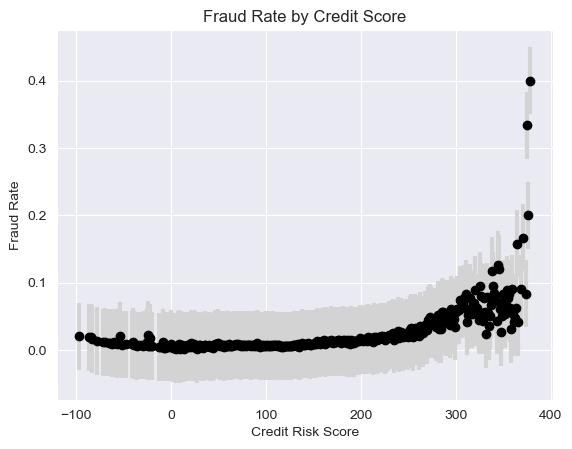

In [16]:
# plot the fraud rate for each credit score as a line with confidence bounds
plt.errorbar(credit_scores, fraud_rates, yerr=0.05, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xlabel('Credit Risk Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Credit Score')
plt.show()

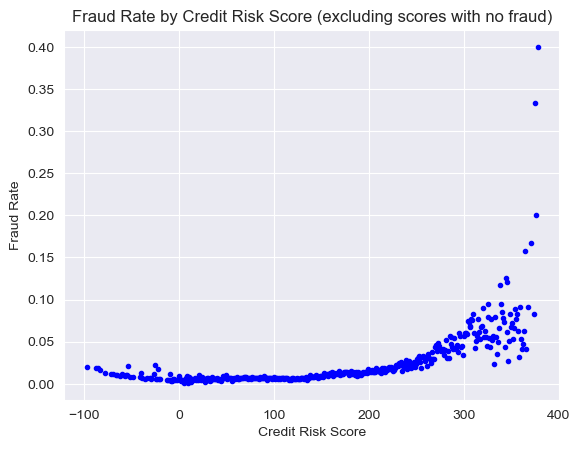

In [17]:
# Plot the fraud rate for each credit score 
plt.plot(credit_scores, fraud_rates, marker='.', linestyle='None', color='b')
plt.xlabel('Credit Risk Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Credit Risk Score (excluding scores with no fraud)')
plt.show()

C:\Users\23357614\AppData\Local\Temp\ipykernel_11884\3451701788.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rates = data.groupby(credit_score_bins).mean()['fraud_bool']


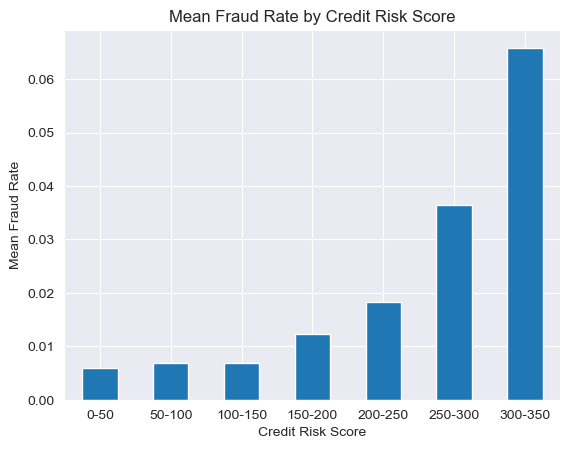

In [18]:
# bar chart of credit risk score (grouped into bunches of 50) and mean fraud rate
credit_score_bins = pd.cut(data['credit_risk_score'], bins=range(0, 400, 50))
fraud_rates = data.groupby(credit_score_bins).mean()['fraud_bool']
fraud_rates.plot(kind='bar')
plt.ylabel('Mean Fraud Rate')
plt.xlabel('Credit Risk Score')
# change the x-axis labels to the mid-point of each bin
plt.xticks(np.arange(7), [f'{i}-{i+50}' for i in range(0, 350, 50)], rotation=0)
plt.title('Mean Fraud Rate by Credit Risk Score')
plt.show()

In [19]:
# get spearman correlation between credit score and fraud
from scipy.stats import spearmanr

correlation, p_value = spearmanr(fraud_rates,credit_scores)
correlation, p_value

# 4.355864816282186e-121
# very low p-value, so we can reject the null hypothesis that there is no correlation between credit score and fraud
# the correlation is 0.85! 

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7 and the array at index 1 has size 415

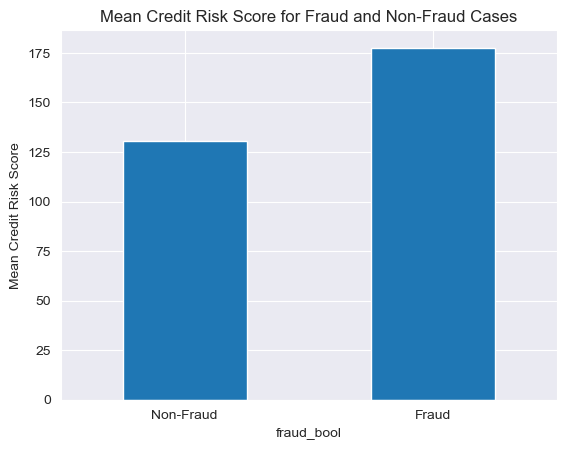

In [82]:
# Reduce dataset size
sample_data = data.sample(frac=1)  # adjust fraction as needed

# Sort values
sample_data = sample_data.sort_values('fraud_bool')

# Perform the groupby operation and plot
fraud_rates = sample_data.groupby('fraud_bool').mean()['credit_risk_score']
fraud_rates.plot(kind='bar')
plt.ylabel('Mean Credit Risk Score')
plt.title('Mean Credit Risk Score for Fraud and Non-Fraud Cases')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

### Is there a correlation between the bank's proposed credit score for the application and the chance of the application being fraudulent?

In [21]:
# Get the unique credit scores and their corresponding fraud rates
credit_scores = data['proposed_credit_limit'].unique()
fraud_rates = [data[data['proposed_credit_limit'] == score]['fraud_bool'].mean() for score in credit_scores]

# Filter fraud_rates and credit_scores to remove any credit scores with no fraud
fraud_rates, credit_scores = zip(*[(fraud_rates[i], credit_scores[i]) for i in range(len(fraud_rates)) if fraud_rates[i] != 0])

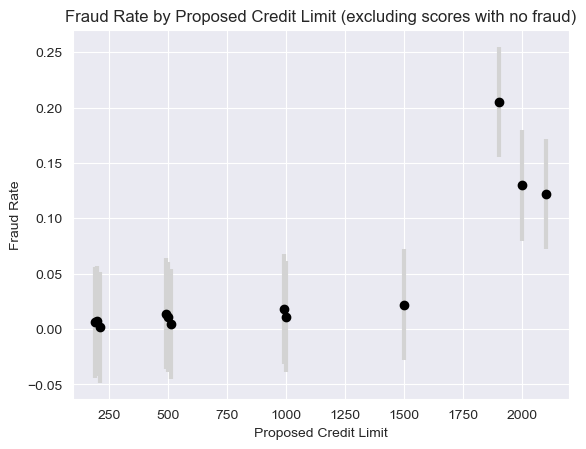

In [22]:
# plot the fraud rate for each credit score as a line with confidence bounds
plt.errorbar(credit_scores, fraud_rates, yerr=0.05, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xlabel('Proposed Credit Limit')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Proposed Credit Limit (excluding scores with no fraud)')
plt.show()

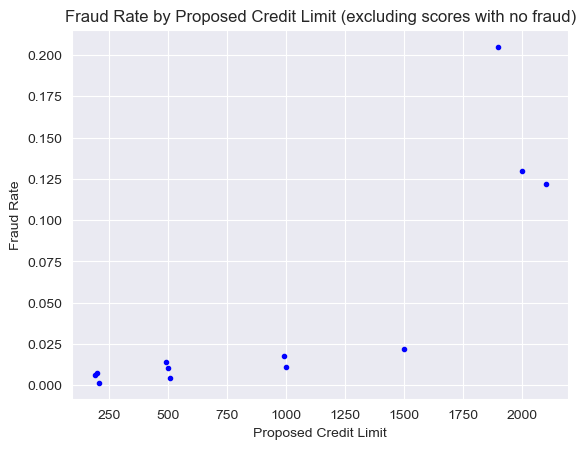

In [23]:
# Plot the fraud rate for each credit score 
plt.plot(credit_scores, fraud_rates, marker='.', linestyle='None', color='b')
plt.xlabel('Proposed Credit Limit')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Proposed Credit Limit (excluding scores with no fraud)')
plt.show()

In [24]:
# get spearman correlation between credit score and fraud
from scipy.stats import spearmanr

correlation, p_value = spearmanr(fraud_rates, credit_scores)
correlation, p_value

# 4.355864816282186e-121
# very low p-value, so we can reject the null hypothesis that there is no correlation between credit score and fraud
# the correlation is 0.85! 

(0.8251748251748254, 0.0009513628555555001)

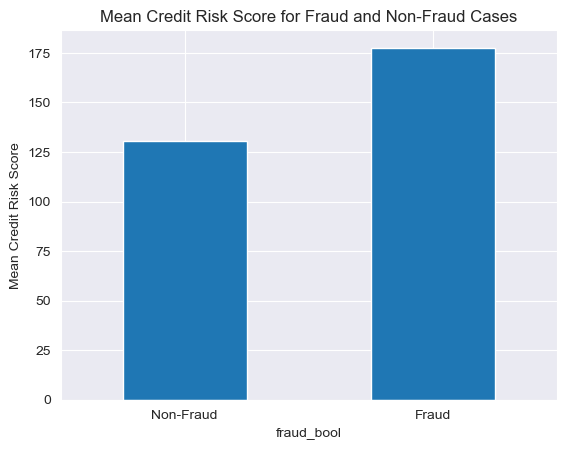

In [25]:
# make a bar chart of non-fraud and fraud cases where the value is the mean fraud rate
fraud_rates = data.groupby('fraud_bool').mean()['credit_risk_score']
fraud_rates.plot(kind='bar')
plt.ylabel('Mean Credit Risk Score')
plt.title('Mean Credit Risk Score for Fraud and Non-Fraud Cases')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()


### How has the fraud rate changed by month in the past year?

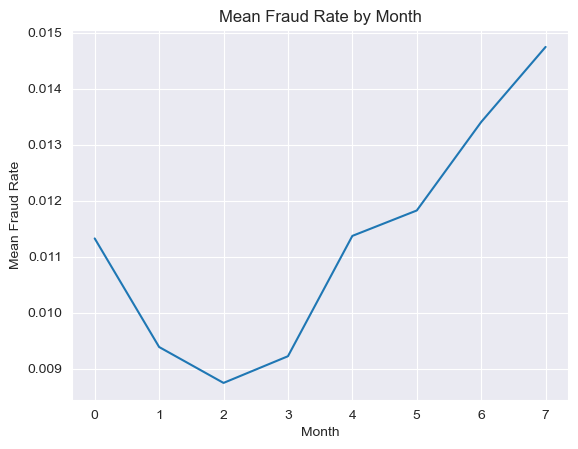

In [26]:
# line plot of fraud rate by month
fraud_rates = data.groupby('month').mean()['fraud_bool']
fraud_rates.plot(kind='line')
plt.ylabel('Mean Fraud Rate')
plt.xlabel('Month')
plt.title('Mean Fraud Rate by Month')
plt.show()

### Device os bar chart

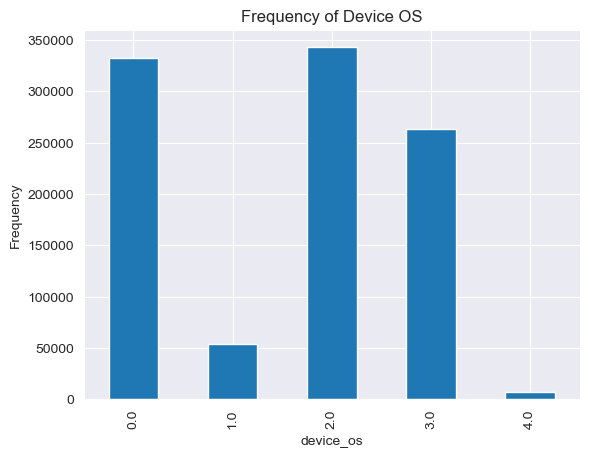

In [27]:
# all applications bar chart of device os and frequency
device_os = data['device_os'].value_counts().sort_index()
device_os.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Frequency of Device OS')
plt.show()

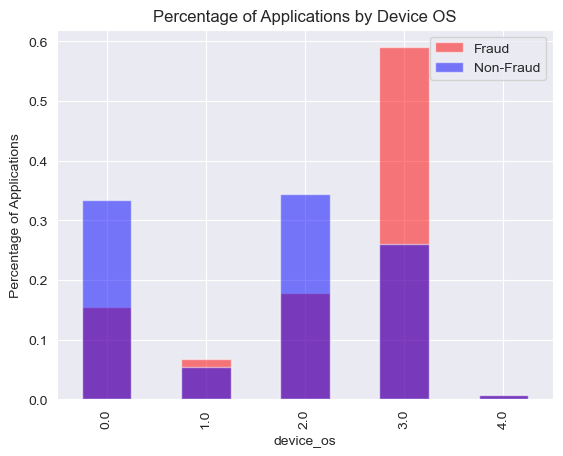

In [28]:
# bar chart of fraud and non-fraud cases by device os

# first change the number of device os's to be a percentage of the total number of applications of fraud and non-fraud respectively
fraud_cases = data[data['fraud_bool'] == 1]
non_fraud_cases = data[data['fraud_bool'] == 0]
fraud_device_os = fraud_cases['device_os'].value_counts(normalize=True).sort_index()
non_fraud_device_os = non_fraud_cases['device_os'].value_counts(normalize=True).sort_index()

# plot the bar chart
fraud_device_os.plot(kind='bar', color='r', alpha=0.5, label='Fraud')
non_fraud_device_os.plot(kind='bar', color='b', alpha=0.5, label='Non-Fraud')
plt.ylabel('Percentage of Applications')
plt.title('Percentage of Applications by Device OS')
plt.legend()
plt.show()

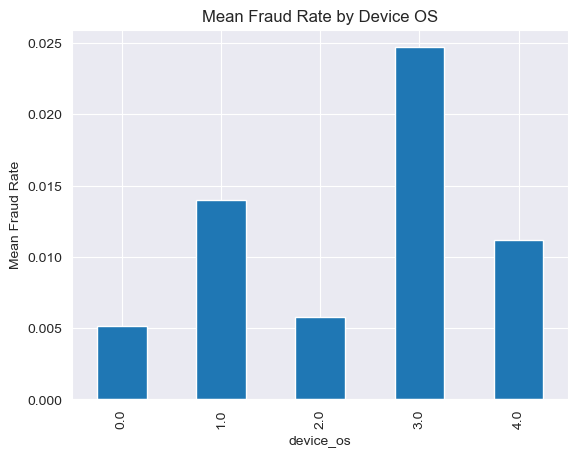

In [29]:
# bar chart of device os and mean fraud rate
fraud_rates = data.groupby('device_os')['fraud_bool'].mean()
fraud_rates.plot(kind='bar')
plt.ylabel('Mean Fraud Rate')
plt.title('Mean Fraud Rate by Device OS')
plt.show()

### Relationship between lines of credit and older people

In [30]:
from scipy.stats import spearmanr

# correlation between age and lines of credit
correlation, p_value = spearmanr(data['customer_age'], data['income'])
correlation, p_value

(0.1415370889443253, 0.0)

### Do fraudulent applications tend to request specific account types or higher initial balances?

In [31]:
# copy the data and remove all rows in which intended balance amount is less than 0
intended_balance_data = data[data['intended_balcon_amount'] > 0]

In [32]:
# bar chart of fraud and non-fraud cases by intended balance amount
fraud_cases = intended_balance_data[intended_balance_data['fraud_bool'] == 1]
non_fraud_cases = intended_balance_data[intended_balance_data['fraud_bool'] == 0]

In [33]:
# get all columns that are not numeric
non_numeric_columns = intended_balance_data.select_dtypes(exclude=[np.number]).columns

In [34]:
# drop non-numeric columns
intended_balance_data = intended_balance_data.drop(non_numeric_columns, axis=1)

In [35]:
# get average intended balance amount for fraud and non-fraud cases
fraud_cases['intended_balcon_amount'].mean(), non_fraud_cases['intended_balcon_amount'].mean()

(41.471790218732956, 36.558029961268176)

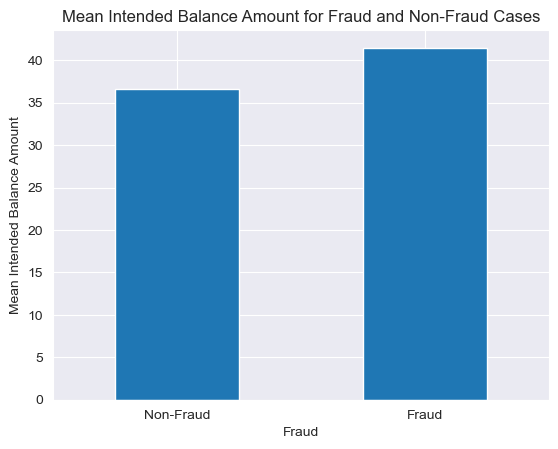

In [36]:
# bar chart of fraud and non-fraud cases by balance amount
fraud_rates = intended_balance_data.groupby('fraud_bool').mean()['intended_balcon_amount']
fraud_rates.plot(kind='bar')
plt.xlabel('Fraud')
plt.ylabel('Mean Intended Balance Amount')
plt.title('Mean Intended Balance Amount for Fraud and Non-Fraud Cases')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [37]:
# correlation between intended balance amount and fraud
correlation, p_value = spearmanr(intended_balance_data['intended_balcon_amount'], intended_balance_data['fraud_bool'])
correlation, p_value

(0.008549872688704484, 1.434904677166343e-05)

### What percentage of applications with a credit risk score below X are fraudulent? (X can be a specific value or a range)


In [38]:
# What percentage of applications with a credit risk score below X are fraudulent? (X can be a specific value or a range)
# get the percentage of applications with a credit risk score below each unique value for credit risk score that are fraudulent and put it in an array
fraud_rates = [data[data['credit_risk_score'] < score]['fraud_bool'].mean() for score in data['credit_risk_score'].unique()]

In [39]:
# remove all nan values from the array
fraud_rates = [rate for rate in fraud_rates if not np.isnan(rate)]

In [40]:
# remove all 0
fraud_rates = [rate for rate in fraud_rates if rate != 0]

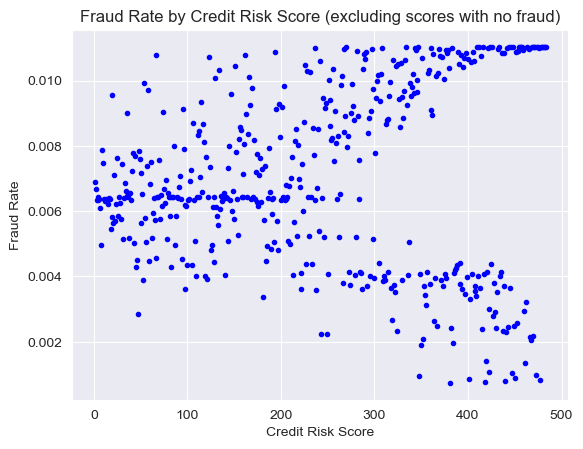

In [41]:
# plot the fraud rate for each credit score as a line with confidence bounds
plt.plot([i+1 for i in range(len(fraud_rates))], fraud_rates, marker='.', linestyle='None', color='b')
plt.xlabel('Credit Risk Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Credit Risk Score (excluding scores with no fraud)')
plt.show()

In [42]:
# get the percentage of fraud for the highest 10% of credit risk scores
top_10_percent = data['credit_risk_score'].quantile(0.9)
top_rate = data[data['credit_risk_score'] > top_10_percent]['fraud_bool'].mean()
top_rate
# get the percentage of fraud for the lowest 10% of credit risk scores
bottom_10_percent = data['credit_risk_score'].quantile(0.1)
bottom_rate = data[data['credit_risk_score'] < bottom_10_percent]['fraud_bool'].mean()
bottom_rate

0.005377544187179123

### Is there a correlation between foreign_request and fraud_bool? (Are applications from outside the usual region more likely to be fraudulent?)

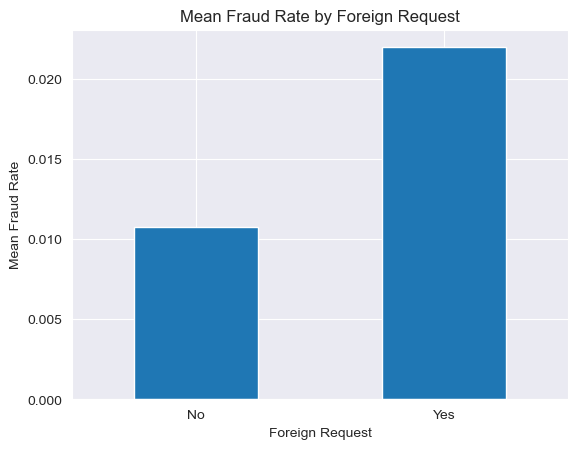

In [43]:
# bar chart of fraud and non-fraud cases by foreign request
fraud_rates = data.groupby('foreign_request').mean()['fraud_bool']
fraud_rates.plot(kind='bar')
plt.xlabel('Foreign Request')
plt.ylabel('Mean Fraud Rate')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.title('Mean Fraud Rate by Foreign Request')
plt.show()

In [44]:
# get spearman correlation between foreign request and fraud
correlation, p_value = spearmanr(data['foreign_request'], data['fraud_bool'])
correlation, p_value


(0.016884625640162684, 5.722730412239716e-64)

In [80]:
# how many fraud applications are foreign
fraud_foreign = data[data['fraud_bool'] == 1]['foreign_request'].sum()

# how many fraud applications are non-foreign
fraud_non_foreign = data[data['fraud_bool'] == 1]['foreign_request'].count() - fraud_foreign

# how many non-fraud applications are foreign
non_fraud_foreign = data[data['fraud_bool'] == 0]['foreign_request'].sum()

# how many non-fraud applications are non-foreign
non_fraud_non_foreign = data[data['fraud_bool'] == 0]['foreign_request'].count() - non_fraud_foreign

fraud_foreign/ (fraud_foreign + fraud_non_foreign)
non_fraud_foreign/ (non_fraud_foreign + non_fraud_non_foreign)



0.024962309309373074

### Do applicants with a higher name_email_similarity score have a lower risk of fraud? (Does a name matching the email address indicate legitimacy?)

In [45]:
# get spearman correlation between name_email_similarity and fraud
correlation, p_value = spearmanr(data['name_email_similarity'], data['fraud_bool'])
correlation, p_value
# (-0.03728264474118926, 1.9366392065804243e-304)
# very low p-value, so we can reject the null hypothesis that there is no correlation between name_email_similarity and fraud
# the correlation is -0.037, so there is a very weak negative correlation between name_email_similarity and fraud
# negative correlation means that as name_email_similarity increases, fraud decreases

(-0.03728264474118926, 1.9366392065804243e-304)

### Do applicants with multiple valid phone numbers (phone_home_valid & phone_mobile_valid) have a lower fraud risk?

In [46]:
# get spearman correlation between phone_home_valid and fraud
correlation, p_value = spearmanr(data['phone_home_valid'], data['fraud_bool'])
correlation, p_value

(-0.03512781487305025, 1.7348994849323414e-270)

In [47]:
# get spearman correlation between phone_mobile_valid and fraud
correlation, p_value = spearmanr(data['phone_mobile_valid'], data['fraud_bool'])
correlation, p_value

(-0.013179679009677302, 1.1403516458038746e-39)

In [48]:
# get spearman correlation between phone_mobile_valid and phone_home_valid
correlation, p_value = spearmanr(data['phone_mobile_valid'], data['phone_home_valid'])
correlation, p_value

(-0.2723921162274204, 0.0)

In [49]:
# get the rate of fraud for users with one valid phone number and two valid phone numbers
one_phone = data[data['phone_home_valid'] + data['phone_mobile_valid'] == 1]['fraud_bool'].mean()
two_phones = data[data['phone_home_valid'] + data['phone_mobile_valid'] == 2]['fraud_bool'].mean()
one_phone, two_phones

(0.01332957244564053, 0.005355867288782163)

In [73]:
# get the rate of fraud for users with no valid phone numbers
no_phones = data[data['phone_home_valid'] + data['phone_mobile_valid'] == 0]['fraud_bool'].mean()
no_phones

0.027842749190356245

In [76]:
# get the rate of fraud for if phone_home_valid and if phone_mobile_valid is true
phone_home = data[data['phone_home_valid'] == 1]['fraud_bool'].mean()
phone_mobile = data[data['phone_mobile_valid'] == 1]['fraud_bool'].mean()
phone_home, phone_mobile

(0.00669180990560496, 0.010544288032946826)

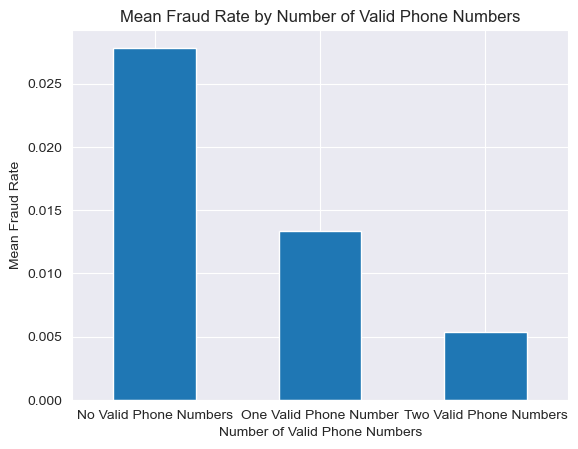

In [77]:
# graph the rate of fraud for users with one valid phone number and two valid phone numbers and no valid phone numbers
fraud_rates = data.groupby(data['phone_home_valid'] + data['phone_mobile_valid']).mean()['fraud_bool']
fraud_rates.plot(kind='bar')
plt.ylabel('Mean Fraud Rate')
plt.xlabel('Number of Valid Phone Numbers')
plt.title('Mean Fraud Rate by Number of Valid Phone Numbers')
plt.xticks([0, 1, 2], ['No Valid Phone Numbers', 'One Valid Phone Number', 'Two Valid Phone Numbers'], rotation=0)
plt.show()



### What is the average days_since_request for fraudulent applications compared to legitimate ones? (Do fraudulent applications tend to be rushed?)

In [50]:
# get the average days since request for fraud and non-fraud cases
fraud_cases = data[data['fraud_bool'] == 1]
non_fraud_cases = data[data['fraud_bool'] == 0]

diff = fraud_cases['days_since_request'].mean() - non_fraud_cases['days_since_request'].mean()

In [51]:
correlation, p_value = spearmanr(data['days_since_request'], data['fraud_bool'])

In [52]:
correlation, p_value
#(-0.014209179671305524, 7.956263614335085e-46)
# very low p-value, so we can reject the null hypothesis that there is no correlation between days since request and fraud
# the correlation is -0.014, so there is a very weak negative correlation between days since request and fraud
# negative correlation means that as days since request increases, fraud decreases

(-0.014209179671305524, 7.956263614335085e-46)

In [53]:
# clone data and scale it
scaled_data = data.copy()
scaled_data = scaled_data.drop('fraud_bool', axis=1)
scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()
scaled_data['fraud_bool'] = data['fraud_bool']

In [54]:
# remove all rows with negative values in the days since request column
scaled_data = scaled_data[scaled_data['days_since_request'] >= 0]

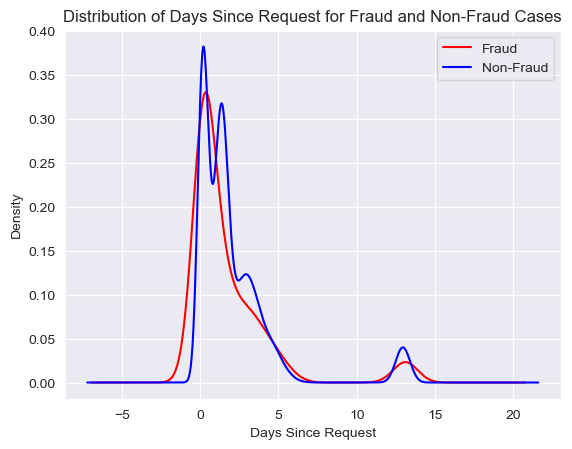

In [55]:
# distribution of days since request for fraud and non-fraud cases
fraud_cases = scaled_data[scaled_data['fraud_bool'] == 1]
non_fraud_cases = scaled_data[scaled_data['fraud_bool'] == 0]
fraud_cases['days_since_request'].plot(kind='kde', label='Fraud', color='r')
non_fraud_cases['days_since_request'].plot(kind='kde', label='Non-Fraud', color='b')
plt.xlabel('Days Since Request')
plt.ylabel('Density')
plt.title('Distribution of Days Since Request for Fraud and Non-Fraud Cases')
plt.legend()
plt.show()

### Investigate the relationship between session_length_in_minutes and keep_alive_session for potential suspicious behavior like automated bots submitting applications.

In [56]:
# get spearman correlation between session_length_in_minutes and keep_alive_session
correlation, p_value = spearmanr(data['session_length_in_minutes'], data['keep_alive_session'])
correlation, p_value

(-0.06278068056707775, 0.0)

In [57]:
# get the average session length for applications with a keep alive session and without a keep alive session
keep_alive = data[data['keep_alive_session'] == 1]['session_length_in_minutes'].mean()
no_keep_alive = data[data['keep_alive_session'] == 0]['session_length_in_minutes'].mean()
keep_alive, no_keep_alive

(7.191982247148279, 8.026293678911482)

In [58]:
# get the average session length for fraud and non-fraud cases
fraud_cases = data[data['fraud_bool'] == 1]
non_fraud_cases = data[data['fraud_bool'] == 0]
fraud_cases['session_length_in_minutes'].mean(), non_fraud_cases['session_length_in_minutes'].mean()

(8.229519783012158, 7.53730577297328)

In [59]:
# get the average keep alive session for fraud and non-fraud cases
fraud_cases['keep_alive_session'].mean(), non_fraud_cases['keep_alive_session'].mean()

(0.3416447547375102, 0.5795710895466095)

### Analyze the distribution of bank_months_count and has_other_cards to see if applicants with no existing accounts are more likely to be fraudulent.

In [60]:
# get spearman correlation between bank_months_count and has_other_cards
correlation, p_value = spearmanr(data['bank_months_count'], data['has_other_cards'])
correlation, p_value


(0.019736493465319093, 1.0094114349383126e-86)

In [61]:
# get the average bank months count for applications with and without other cards
with_cards = data[data['has_other_cards'] == 1]['bank_months_count'].mean()
without_cards = data[data['has_other_cards'] == 0]['bank_months_count'].mean()
with_cards, without_cards


(10.967697813335247, 10.802456075324448)

In [62]:
# get the average bank months count for fraud and non-fraud cases
fraud_cases['bank_months_count'].mean(), non_fraud_cases['bank_months_count'].mean()

(10.469580197660713, 10.843426146974988)

In [63]:
# get the average has other cards for fraud and non-fraud cases
fraud_cases['has_other_cards'].mean(), non_fraud_cases['has_other_cards'].mean()

(0.08441381811587632, 0.22453337863294273)

In [64]:
# get the rate of fraud for users with and without other cards

### Are there any differences in characteristics between fraudulent and legitimate applicants (e.g., age, location, income level)?

In [67]:
# get the average age for fraud and non-fraud cases
fraud_cases['customer_age'].mean(), non_fraud_cases['customer_age'].mean()

(0.058145703922416324, 0.0)

In [68]:
# get the correlation between age and fraud
correlation, p_value = spearmanr(data['customer_age'], data['fraud_bool'])
correlation, p_value

(0.058145703922416324, 0.0)

In [69]:
# get the average income for fraud and non-fraud cases
fraud_cases['income'].mean(), non_fraud_cases['income'].mean()

(14462.344999546649, 12276.759853423408)

In [70]:
# correlation of all features with fraud
correlations = data.corr()['fraud_bool']
correlations

fraud_bool                          1.000000
income                              0.048392
name_email_similarity              -0.036720
prev_address_months_count          -0.026031
current_address_months_count        0.033701
customer_age                        0.062959
days_since_request                  0.000567
intended_balcon_amount             -0.024524
zip_count_4w                        0.005212
velocity_6h                        -0.016892
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
date_of_birth_distinct_emails_4w   -0.043224
credit_risk_score                   0.070624
email_is_free                       0.027758
phone_home_valid                   -0.035128
phone_mobile_valid                 -0.013180
bank_months_count                  -0.003222
has_other_cards                    -0.035156
proposed_credit_limit               0.068907
foreign_request                     0.016885
session_le